In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score

In [16]:
def least_confident_sampling(proba):
    """Input must be of shape (n_samples, n_classes=2)"""
    cls = proba.max(axis=1)
    least_confident = cls.argmin()
    return least_confident


def margin_sampling(proba):
    cls = np.abs(proba[:,0] - proba[:,1])
    return cls.argmin()

In [ ]:
#Sommaire:
# 1. 2 classes demi cercles
# 2. 3 classes monomodales (gaussiennes)
# 3. MNIST 2 digits
# 4. MNIST tous les digits
# 5. MNIST paires / impaires

In [2]:
# make_moons
n_samples = 400
samples, labels = datasets.make_moons(n_samples, noise=.2)
samples0 = samples[labels == 0,:]
samples1 = samples[labels == 1,:]

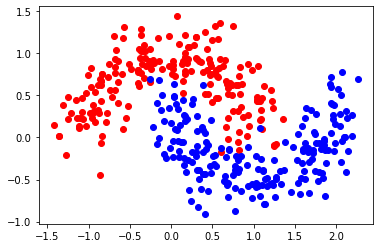

In [3]:
#print moons
plt.figure()
plt.scatter(samples0[:,0], samples0[:,1], c='r')
plt.scatter(samples1[:,0], samples1[:,1], c='b')
plt.show()

In [4]:
#Reference svm trained on the whole dataset
clf_ref = svm.SVC(C=1, kernel='rbf', probability=False)
clf_ref.fit(samples, labels)
acc_ref = accuracy_score(labels, clf_ref.predict(samples), normalize=True)
print(acc_ref)

0.9675


74 [1.73732767 0.47217057] 1
(391, 2) (391,)
105 [0.88926461 0.0997026 ] 0
(390, 2) (390,)
180 [ 1.09587491 -0.05658637] 1
(389, 2) (389,)
0 [-0.84359351  0.7861037 ] 0
(388, 2) (388,)
3 [ 0.75249147 -0.01064427] 1
(387, 2) (387,)
150 [ 0.28968537 -0.13290439] 1
(386, 2) (386,)
89 [0.83556707 0.34166899] 0
(385, 2) (385,)
130 [1.10912758 0.24310892] 0
(384, 2) (384,)
104 [1.08084167 0.07216275] 0
(383, 2) (383,)
0 [ 0.82748086 -0.03868302] 0
(382, 2) (382,)
80 [-1.0376946 -0.1325634] 0
(381, 2) (381,)
56 [-0.08848196 -0.39959949] 1
(380, 2) (380,)
262 [0.05138882 0.23921496] 1
(379, 2) (379,)
156 [0.08618112 0.37298917] 1
(378, 2) (378,)
68 [1.36432314 0.04800994] 1
(377, 2) (377,)
114 [-0.46076937  0.14870713] 0
(376, 2) (376,)
6 [0.92511639 0.06466641] 0
(375, 2) (375,)
RESULT:
(10000,)
[-0.02965331 -0.0296535  -0.02965373 -0.02965401 -0.02965436 -0.0296548
 -0.02965532 -0.02965594 -0.02965667 -0.02965753]


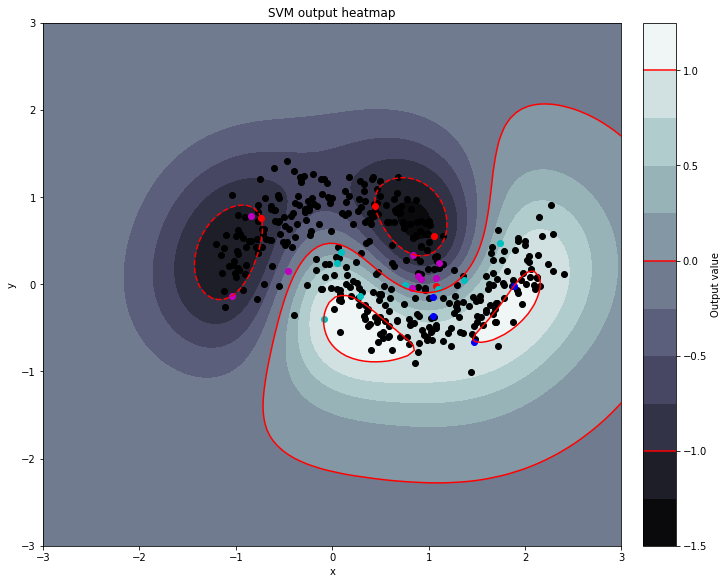

In [35]:
#Randomly select a few samples
pool = samples
target = labels
n_samples_init = 8
samples_init_idx = np.random.choice(np.arange(n_samples), size=n_samples_init)
train_set = pool[samples_init_idx,:]
train_lab = target[samples_init_idx]
lab_0_idx = train_lab == 0
lab_1_idx = train_lab == 1
initial_label_0 = lab_0_idx
initial_label_1 = lab_1_idx
initial_samples = train_set
mask = np.ones((n_samples,)).astype(np.bool)

for i in samples_init_idx:
    mask[i] = False

pool = pool[mask,:] #removing the now labeled samples
target= target[mask] #Idem

clf = svm.SVC(C=1, kernel='rbf', probability=True)
clf.fit(train_set, train_lab)
acc = accuracy_score(target, clf.predict(pool), normalize=True)
sampling_strat = margin_sampling


while acc_ref-.0001 >= acc:
    # Selecting a new sample
    new_sample_idx = sampling_strat(clf.predict_proba(pool))
    new_sample = pool[new_sample_idx,:]
    new_label = target[new_sample_idx]
    print(new_sample_idx, new_sample, new_label)
    # Adding new sample to training set
    #print(train_set)
    #print(new_sample)
    #print(np.append(train_set, np.array([new_sample]), axis=0))
    tmp_set = np.append(train_set, np.array([new_sample]), axis=0)
    tmp_lab = np.append(train_lab, new_label)
    del(train_set); del(train_lab)
    train_set = tmp_set
    train_lab = tmp_lab
    del(tmp_set); del(tmp_lab)
    lab_0_idx = train_lab == 0
    lab_1_idx = train_lab == 1
    #print(train_set.shape, train_lab.shape)
    # Removing new sample from the pool
    mask = np.ones(pool.shape[0]).astype(np.bool)
    mask[new_sample_idx] = False
    pool = pool[mask,:]
    target = target[mask]
    print(pool.shape, target.shape)
    clf.fit(train_set, train_lab)
    acc = accuracy_score(target, clf.predict(pool), normalize=True)


print("RESULT:")
queries = train_set[n_samples_init:,:]
queries_l = train_lab[n_samples_init:]
queries_l_0 = queries_l == 0
queries_l_1 = queries_l == 1


BX = 3
origin = 'lower'
nbs = 100
delta = (2*BX)/(nbs-1)
_x = _y = np.arange(-BX, BX + .0001, delta)
_X, _Y = np.meshgrid(_x, _y)
Xr = np.reshape(_X, (nbs*nbs, 1))
Yr = np.reshape(_Y, (nbs*nbs, 1))

Xmap = np.concatenate((Xr, Yr), axis=1)
Ymapr = clf_ref.decision_function(Xmap)
print(Ymapr.shape)
print(Ymapr[:10])
Ymap = np.reshape(Ymapr, (nbs, nbs))

fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(10,8))
CS = ax1.contourf(_X, _Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

CS2 = ax1.contour(CS, levels=(-1,0,1), colors='r', origin=origin)

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')

cbar.add_lines(CS2)

ax1.scatter(pool[:,0], pool[:,1], c='k')
ax1.scatter(initial_samples[initial_label_0,0], initial_samples[initial_label_0,1], c='r')
ax1.scatter(initial_samples[initial_label_1,0], initial_samples[initial_label_1,1], c='b')
ax1.scatter(queries[queries_l_0,0], queries[queries_l_0,1], c='m')
ax1.scatter(queries[queries_l_1,0], queries[queries_l_1,1], c='c')

plt.show()



(10000,)
[-0.14730206 -0.14731357 -0.14732759 -0.14734456 -0.14736495 -0.14738924
 -0.14741798 -0.14745171 -0.14749098 -0.14753636]


NameError: name 'initial_samples' is not defined

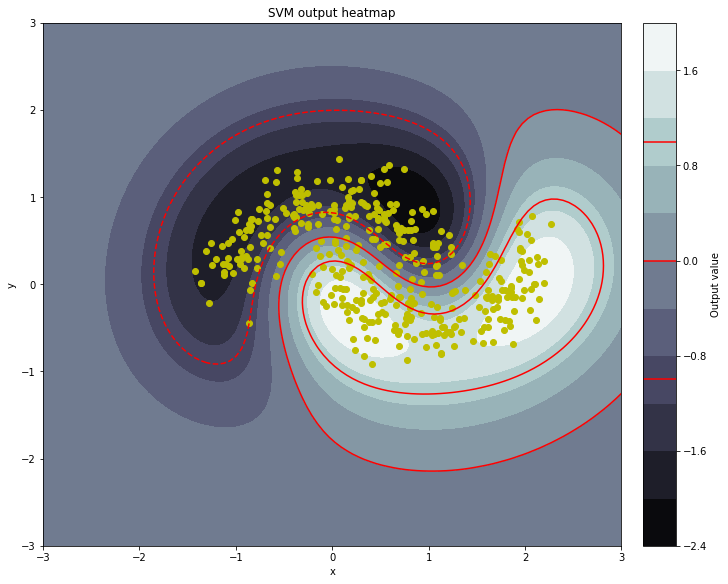

In [7]:
BX = 3
origin = 'lower'
nbs = 100
delta = (2*BX)/(nbs-1)
_x = _y = np.arange(-BX, BX + .0001, delta)
_X, _Y = np.meshgrid(_x, _y)
Xr = np.reshape(_X, (nbs*nbs, 1))
Yr = np.reshape(_Y, (nbs*nbs, 1))

Xmap = np.concatenate((Xr, Yr), axis=1)
Ymapr = clf_ref.decision_function(Xmap)
print(Ymapr.shape)
print(Ymapr[:10])
Ymap = np.reshape(Ymapr, (nbs, nbs))

fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(10,8))
CS = ax1.contourf(_X, _Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

CS2 = ax1.contour(CS, levels=(-1,0,1), colors='r', origin=origin)

cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')

cbar.add_lines(CS2)

ax1.scatter(samples[:,0], samples[:,1], c='y')
ax1.scatter(initial_samples[initial_label_0,0], initial_samples[initial_label_0,1], c='r')
ax1.scatter(initial_samples[initial_label_1,0], initial_samples[initial_label_1,1], c='b')
ax1.scatter(queries[queries_l_0,0], queries[queries_l_0,1], c='m')
ax1.scatter(queries[queries_l_1,0], queries[queries_l_1,1], c='c')

plt.show()
